In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/student-enrollment.csv'
student_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
student_data.head()


,State,Enrolment - All Types of Management - Total (Pre-primary to 12),Enrolment - All Types of Management - Pre- Primary,Enrolment - All Types of Management - Primary (1 to 5),Enrolment - All Types of Management - Upper Primary (6-8),Enrolment - All Types of Management - Elementary (1-8),Enrolment - All Types of Management - Secondary (9-10),Enrolment - All Types of Management - Higher Secondary (11-12)
0,Andaman and Nicobar Islands,73861,6885,25964,17719,43683,11810,11483
1,Andhra Pradesh,8244647,77391,3724793,2169034,5893827,1341250,932179
2,Arunachal Pradesh,354382,26076,164061,84930,248991,45455,33860
3,Assam,7544960,443388,3645363,1905775,5551138,1004682,545752
4,Bihar,27472692,426254,14179532,7253543,21433075,3618298,1995065


In [2]:
# Data Cleaning and Preprocessing

# 1. Check for missing values
missing_values = student_data.isnull().sum()

# 2. Normalize the data
# Normalizing numerical columns
scaler = StandardScaler()
normalized_data = scaler.fit_transform(student_data.select_dtypes(include=[np.number]))

# The dataset appears to be fully numerical, so no encoding of categorical variables is necessary

# Displaying missing values information
missing_values


State                                                              0
Enrolment - All Types of Management - Total (Pre-primary to 12)    0
Enrolment - All Types of Management - Pre- Primary                 0
Enrolment - All Types of Management - Primary (1 to 5)             0
Enrolment - All Types of Management - Upper Primary (6-8)          0
Enrolment - All Types of Management - Elementary (1-8)             0
Enrolment - All Types of Management - Secondary (9-10)             0
Enrolment - All Types of Management - Higher Secondary (11-12)     0
dtype: int64

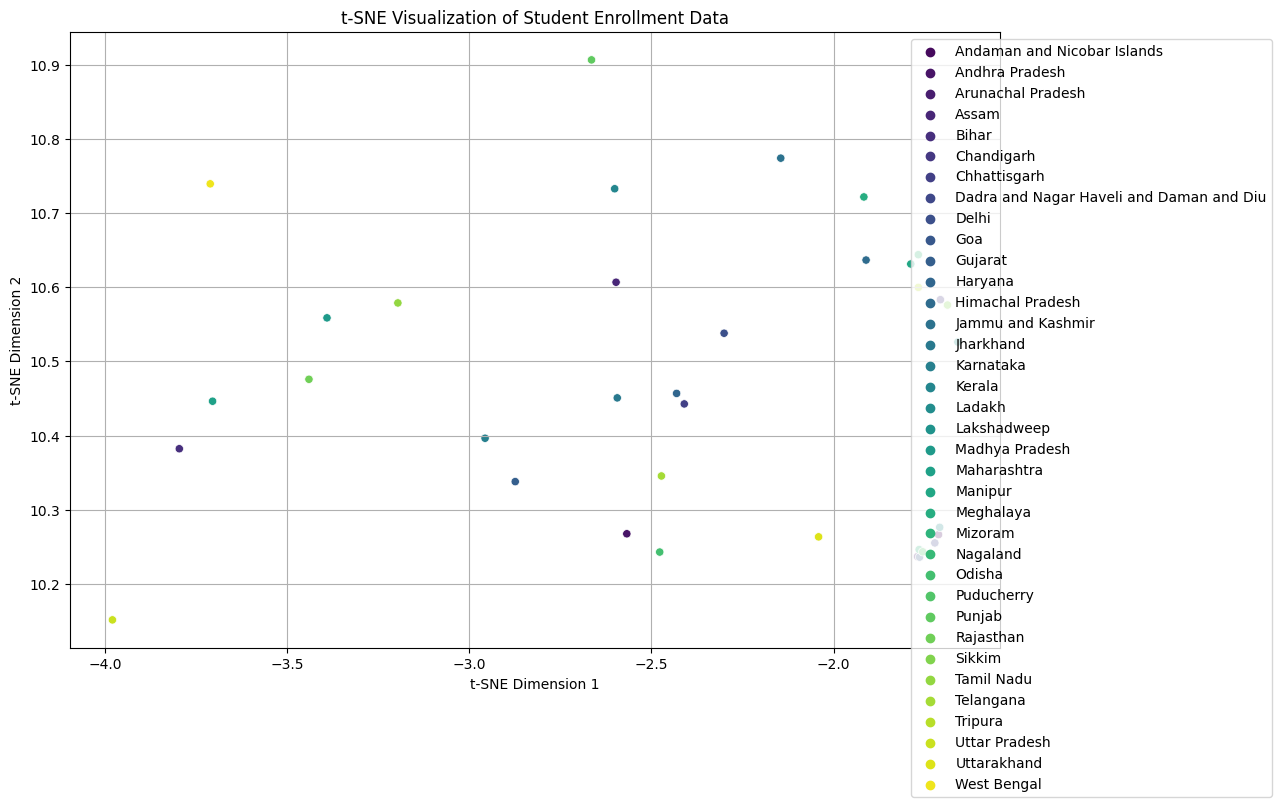

In [3]:
# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(normalized_data)

# Creating a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])

# Merging the t-SNE results with the state names for better interpretability in the visualization
tsne_df = pd.concat([student_data['State'], tsne_df], axis=1)

# Visualizing the results of t-SNE in a 2D plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', data=tsne_df, hue='State', legend="full", palette='viridis')
plt.title('t-SNE Visualization of Student Enrollment Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1)
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


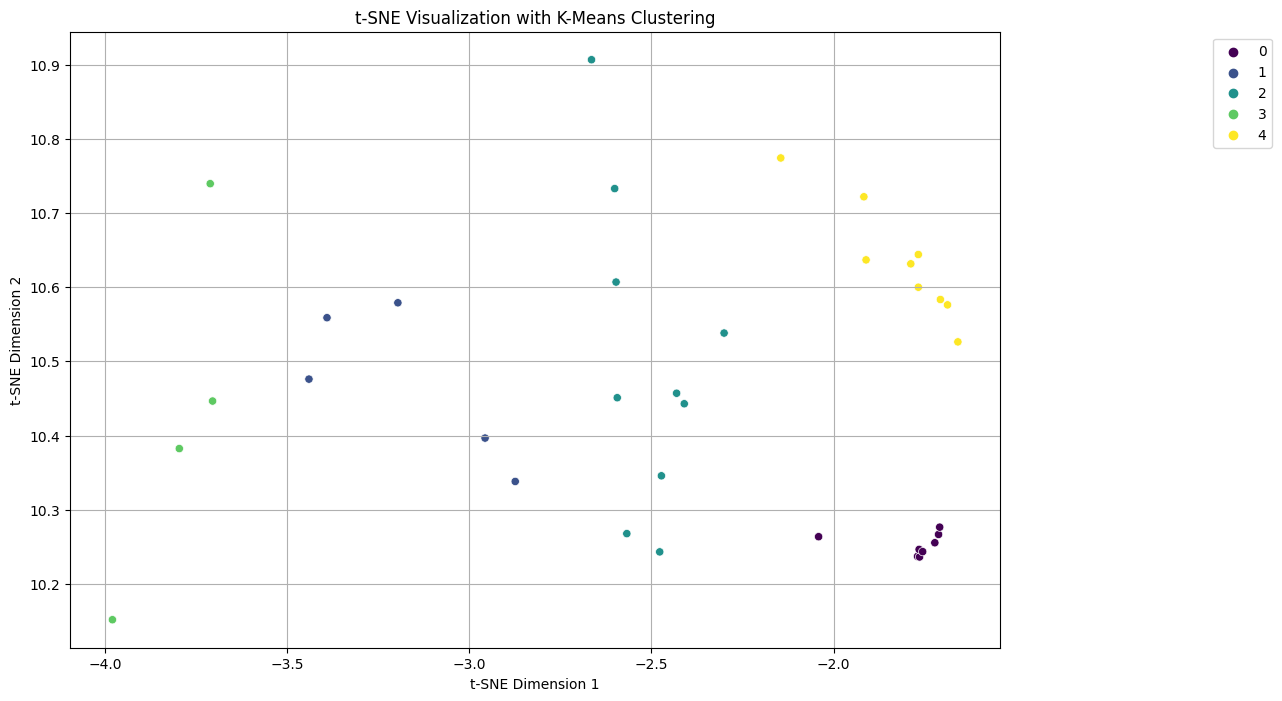

In [4]:
from sklearn.cluster import KMeans

# Applying K-Means clustering on the t-SNE reduced data
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(tsne_results)

# Adding the cluster information to the t-SNE DataFrame
tsne_df['Cluster'] = clusters

# Visualizing the t-SNE results with cluster information
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=tsne_df, palette='viridis', legend="full")
plt.title('t-SNE Visualization with K-Means Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1)
plt.grid(True)
plt.show()
